<a href="https://colab.research.google.com/github/achyutak/Project-2021/blob/main/Eluvio/Eluvio_DS_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Eluvio_DS_Challenge.csv')

In [ ]:
raw = data.copy()

In [ ]:
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

#Analyzing the imported data

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [ ]:
raw.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [ ]:
raw.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [ ]:
raw.groupby(by='date_created').up_votes.sum().to_frame()

,up_votes
date_created,
2008-01-25,33
2008-01-28,4
2008-01-29,3
2008-01-30,14
2008-01-31,16
...,...
2016-11-18,46260
2016-11-19,48631
2016-11-20,41853


Since there are 3225 days between 01-25-2008 and 11-22-2016, and the dataset only has 3223 dates, the datasets is missing records from two days. If we observe the dataframe in the previous cell, we can observe that the missing days are 01-26-2008 and 01-27-2008. So, lets remove the top 7 records and start our dataset with 01-28-2008 for the purpose of time series analysis.

In [ ]:
raw = raw.drop(index=np.arange(7)).reset_index().drop(columns='index')

In [ ]:
raw

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
1,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
2,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews
3,1201701773,2008-01-30,4,0,Archbishop of Canterbury calls for new law to ...,False,bgholt1970,worldnews
4,1201719875,2008-01-30,9,0,Top US Envoy: Violence In Kenya Is Ethnic Cle...,False,smacfarl,worldnews
...,...,...,...,...,...,...,...,...
509224,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509225,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509226,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509227,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [ ]:
raw.up_votes.describe()

count    509236.000000
mean        112.236283
std         541.694675
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [ ]:
raw.down_votes.describe()

count    509236.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: down_votes, dtype: float64

The down_votes feature doesn't contribute to the knowledge about the dataset as it has only one value '0'


In [ ]:
raw.category.describe()

count        509236
unique            1
top       worldnews
freq         509236
Name: category, dtype: object

The category feature has only one value 'worldnews'. So, it doesn't contribute to any knowledge about the dataset.

In [ ]:
raw.over_18.unique()

array([False,  True])

In [ ]:
raw.over_18.describe()

count     509236
unique         2
top        False
freq      508916
Name: over_18, dtype: object

In [ ]:
raw.groupby(by='over_18').up_votes.sum()

over_18
False    57033036
True       121720
Name: up_votes, dtype: int64

In [ ]:
raw.groupby(by='over_18').up_votes.count()

over_18
False    508916
True        320
Name: up_votes, dtype: int64

In [ ]:
print('Average upvotes for over18 posts is {} whereas the average upvotes for under18 posts is {}'.format(121720/320,57033036/508916))

Average upvotes for over18 posts is 380.375 whereas the average upvotes for under18 posts is 112.06768111043866


This means that the NSFW posts attract more interaction on the website than the non-NSFW posts.

In [ ]:
raw.author.describe()

count            509236
unique            85838
top       davidreiss666
freq               8897
Name: author, dtype: object

In [ ]:
Authors_and_upvotes = raw.groupby(by='author',as_index=False).up_votes.sum()

In [ ]:
Authors_and_upvotes.head()

,author,up_votes
0,---SB,1
1,---annon---,0
2,---sniff---,102
3,--Chocobo,5
4,--Danger--,10


In [ ]:
Authors_and_upvotes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85838 entries, 0 to 85837
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   author    85838 non-null  object
 1   up_votes  85838 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


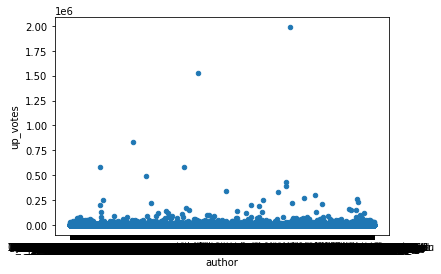

In [ ]:
# Authors_and_upvotes.plot.scatter(x='author',y='up_votes')

# Transforming the data

In [ ]:
mod_data = raw.copy()

Since the category and down_votes features does not have any contribution to the knowledge, they can be removed from the dataset.

In [ ]:
mod_data.drop(columns=['category','down_votes'],inplace=True)

In [ ]:
def get_day(posted_date):
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  return day_name[datetime.datetime.strptime(posted_date, '%Y-%m-%d').weekday()]
# def get_time(epoch):
#   return time.ctime(epoch).split()[3]
# def get_timestamp(epoch):
#   return type(datetime.datetime.fromtimestamp(epoch).strftime('%Y-%m-%d %H:%M:%S'))

Lets create two features `['day_created', 'time_in_local']` from the existing features `date_created` and `time_created` respectively. The `day_created` feature holds the value of the day of the week [Monday, Tuesday, Wednesday etc.]. Whereas the time feature holds the value of the local time at which the post was created.

In [ ]:
mod_data['day_created'] = mod_data['date_created'].apply(lambda x: get_day(x))
# mod_data['time'] = mod_data['time_created'].apply(lambda x: get_time(x))
# mod_data['time_created'] = mod_data['time_created'].apply(lambda x: get_timestamp)

In [ ]:
mod_data['time_created'] = pd.to_datetime(mod_data['time_created'], unit='s')

In [ ]:
mod_data.head(5)

,time_created,date_created,up_votes,title,over_18,author,day_created
0,2008-01-28 16:11:02,2008-01-28,0,The U.N. Mismanagement Program,False,Moldavite,Monday
1,2008-01-28 22:13:16,2008-01-28,4,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,Monday
2,2008-01-29 19:44:29,2008-01-29,3,US plans for missile shields in Polish town me...,False,JoeyRamone63,Tuesday
3,2008-01-30 14:02:53,2008-01-30,4,Archbishop of Canterbury calls for new law to ...,False,bgholt1970,Wednesday
4,2008-01-30 19:04:35,2008-01-30,9,Top US Envoy: Violence In Kenya Is Ethnic Cle...,False,smacfarl,Wednesday


#Lets analyze the dataset with the newly created features

Text(0, 0.5, 'Total number of upvotes the website gained on a particular day of a week')

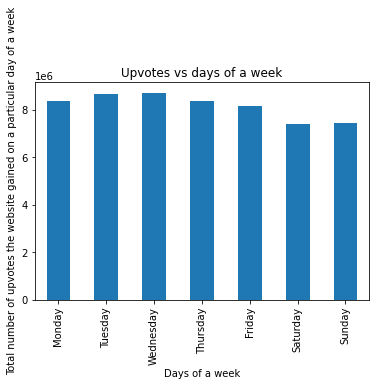

In [ ]:
mod_data.groupby(by='day_created').up_votes.sum().reindex(labels).plot.bar()
plt.title('Upvotes vs days of a week')
plt.xlabel('Days of a week')
plt.ylabel('Total number of upvotes the website gained on a particular day of a week')
# plt.xticks(np.arange(7),labels=labels)

The above plot displays that the website has less activity on the Weekends (Saturday and Sunday) compared to the Weekdays

Text(0, 0.5, 'Number of authors posted on a particular day of a week')

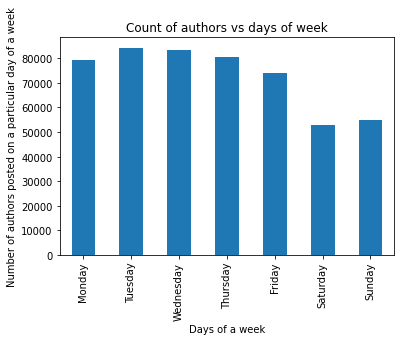

In [ ]:
mod_data.groupby(by='day_created').author.count().reindex(labels).plot.bar()
plt.title('Count of authors vs days of week')
plt.xlabel('Days of a week')
plt.ylabel('Number of authors posted on a particular day of a week')
# plt.xticks(np.arange(7),labels=labels)

The above plot shows that the authors prefer to post more on a weekday comapred to the weekend(Saturday, Sunday). There is a peak on Tuesdays, and Wednesdays. This means that more authors prefer to post in the middle of the week. This shows that there is a direct relation between the number of posts and the activity on the website

In [ ]:
time_intervals_and_up_votes = mod_data.resample('H',on='time_created').up_votes.sum().to_frame()

In [ ]:
time_intervals_and_up_votes.drop(time_intervals_and_up_votes[time_intervals_and_up_votes.up_votes == 0].index,inplace=True)

In [ ]:
time_intervals_and_up_votes = time_intervals_and_up_votes.reset_index()

In [ ]:
str(time_intervals_and_up_votes['time_created'][0]).split()[1]

'22:00:00'

In [ ]:
time_intervals_and_up_votes['time'] = time_intervals_and_up_votes['time_created'].apply(lambda x: str(x).split()[1])

In [ ]:
hourly_sum_of_upvotes_over_8_years = time_intervals_and_up_votes.groupby(by='time').up_votes.sum()

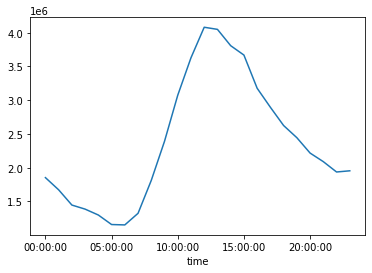

In [ ]:
hourly_sum_of_upvotes_over_8_years.plot.line()

Since 3222 is the number of days between 1-28-2008 and 11-22-2016, lets find the daily average

In [ ]:
daily_average_on_hourly_sum_of_upvotes = hourly_sum_of_upvotes_over_8_years/3222

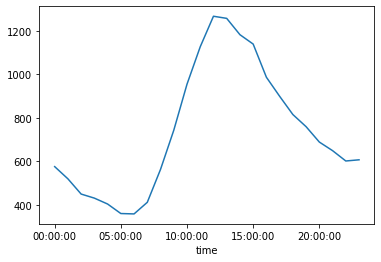

In [ ]:
daily_average_on_hourly_sum_of_upvotes.plot.line()

# Lets analyze the periodicity of the activity on the website


In [ ]:
periodicity = mod_data.resample('H',on='time_created').up_votes.sum().to_frame()
periodicity = periodicity.reset_index()

In [ ]:
periodicity['time'] = periodicity['time_created'].apply(lambda x: str(x).split()[1])
periodicity['date'] = periodicity['time_created'].apply(lambda x: str(x).split()[0])

In [ ]:
periodicity

,time_created,up_votes,time,date
0,2008-01-25 03:00:00,9,03:00:00,2008-01-25
1,2008-01-25 04:00:00,0,04:00:00,2008-01-25
2,2008-01-25 05:00:00,0,05:00:00,2008-01-25
3,2008-01-25 06:00:00,0,06:00:00,2008-01-25
4,2008-01-25 07:00:00,0,07:00:00,2008-01-25
...,...,...,...,...
77381,2016-11-22 08:00:00,75,08:00:00,2016-11-22
77382,2016-11-22 09:00:00,126,09:00:00,2016-11-22
77383,2016-11-22 10:00:00,85,10:00:00,2016-11-22
77384,2016-11-22 11:00:00,115,11:00:00,2016-11-22


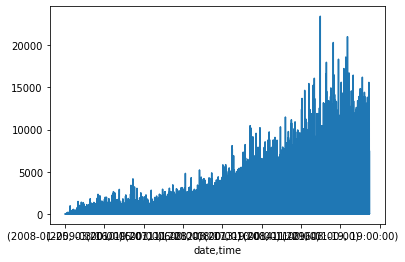

In [ ]:
periodicity.groupby(by=['date','time']).up_votes.sum().plot.line()

As we can notice an increasing trend of activity on the website, it is still unclear if there is any periodic repitition in the activity.

# Lets split the dataset into NSFW and nonNSFW

In [ ]:
NSFW = mod_data[mod_data['over_18'] == True].copy()
NSFW.drop(columns='over_18',inplace = True)
NSFW.reset_index(inplace=True)

In [ ]:
nonNSFW = mod_data[mod_data['over_18'] == False].copy()
nonNSFW.drop(columns='over_18',inplace = True)
nonNSFW.reset_index(inplace=True)

In [ ]:
NSFW

,index,time_created,date_created,up_votes,title,author,day_created
0,1885,2008-03-24 17:57:18,2008-03-24,189,Pics from the Tibetan protests - more graphic ...,pressed,Monday
1,6721,2008-05-18 19:25:18,2008-05-18,5,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",alllie,Sunday
2,8414,2008-06-05 19:42:05,2008-06-05,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,stesch,Thursday
3,12163,2008-07-21 20:26:56,2008-07-21,0,Love Parade Dortmund: Techno Festival Breaks R...,stesch,Monday
4,12699,2008-07-30 01:29:40,2008-07-30,5,IDF kills young Palestinian boy. Potentially N...,cup,Wednesday
...,...,...,...,...,...,...,...
315,503776,2016-10-31 04:59:26,2016-10-31,4,Latest Italian Earthquake Devastates Medieval ...,pixelinthe,Monday
316,508067,2016-11-17 16:30:29,2016-11-17,12,ISIS Release Video Showing Melbourne As A Poss...,halacska,Thursday
317,508176,2016-11-18 02:04:41,2016-11-18,0,Animal welfare activists have released footage...,NinjaDiscoJesus,Friday
318,508376,2016-11-18 18:14:35,2016-11-18,6,Jungle Justice : Public lynching of a street ...,avivi_,Friday


In [ ]:
import datetime
import calendar

def weekday_count(start, end):
  start_date  = datetime.datetime.strptime(start, '%d/%m/%Y')
  end_date    = datetime.datetime.strptime(end, '%d/%m/%Y')
  week        = {}
  for i in range((end_date - start_date).days):
    day       = calendar.day_name[(start_date + datetime.timedelta(days=i+1)).weekday()]
    week[day] = week[day] + 1 if day in week else 1
  return week

print(weekday_count("24/03/2008", "20/11/2016"))

{'Tuesday': 452, 'Wednesday': 452, 'Thursday': 452, 'Friday': 452, 'Saturday': 452, 'Sunday': 452, 'Monday': 451}


Since there are 452 Tuesdays,Wednesdays,Thursdays,Fridays,but only Saturdays and 451 Mondays between the beginning and the ending dates of the NSFW posts, lets calculate the average number of upvotes per day in a week.

In [ ]:
weekly_avg = NSFW.groupby(by='day_created',sort=False).up_votes.sum().reindex(labels).to_frame().copy()
weekly_avg['count'] = NSFW.groupby(by='day_created',sort=False).up_votes.count().reindex(labels).to_frame().copy()

In [ ]:
weekly_avg.loc[['Monday']] = weekly_avg.loc[['Monday']]/451

In [ ]:
weekly_avg.loc[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']] = weekly_avg.loc[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]/452

In [ ]:
weekly_avg

,up_votes,count
day_created,,
Monday,32.962306,0.099778
Tuesday,45.185841,0.117257
Wednesday,24.621681,0.126106
Thursday,66.884956,0.108407
Friday,42.834071,0.101770
Saturday,21.480088,0.079646
Sunday,35.396018,0.075221


Text(0, 0.5, 'up_votes')

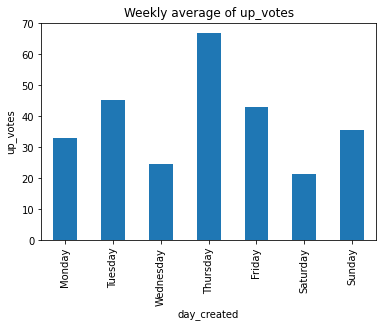

In [ ]:
weekly_avg['up_votes'].plot.bar()
plt.title("Weekly average of up_votes")
plt.ylabel("up_votes")

The above plot shows that the website attracts more activity on Thursdays whereas the least activity on Saturdays. However, this representation is not accurate as there may be a few posts that performed significantly better than others and the dataset is likely biased based on that.

Lets observe a box plot on NSFW to further understand the bias in dataset.


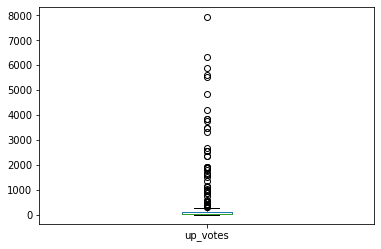

In [ ]:
NSFW.up_votes.plot.box()

This shows that there are many outliers in the dataset. However, in this case the outliers are desirable. We need to attract more activity on the website. So, lets analyze what could be the potential reasons for such outliers.

First lets identify the usual trends in the dataset.

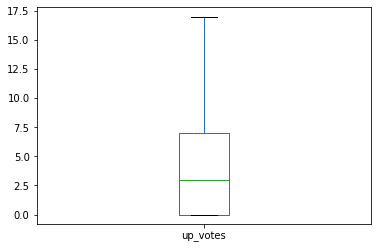

In [ ]:
NSFW.up_votes[NSFW.up_votes < 17.5].plot.box()

In [ ]:
NSFW_without_outliers = NSFW[NSFW.up_votes < 17.5]

In [ ]:
NSFW_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         197 non-null    int64         
 1   time_created  197 non-null    datetime64[ns]
 2   date_created  197 non-null    object        
 3   up_votes      197 non-null    int64         
 4   title         197 non-null    object        
 5   author        197 non-null    object        
 6   day_created   197 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 12.3+ KB


In [ ]:
197/320

0.615625

197 records of 320 (61%) in NSFW lie in a cluster. Whereas the remaining 39% are outliers.

In [ ]:
weekly_avg = NSFW_without_outliers.groupby(by='day_created',sort=False).up_votes.sum().reindex(labels).to_frame().copy()
weekly_avg['count'] = NSFW_without_outliers.groupby(by='day_created',sort=False).up_votes.count().reindex(labels).to_frame().copy()

In [ ]:
weekly_avg.loc[['Monday']] = weekly_avg.loc[['Monday']]/451
weekly_avg.loc[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']] = weekly_avg.loc[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]/452

Text(0, 0.5, 'up_votes')

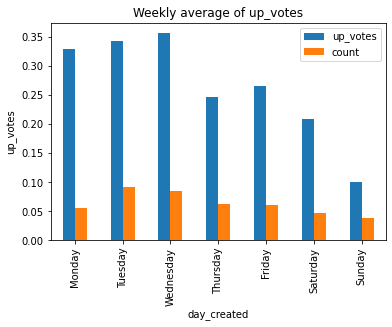

In [ ]:
weekly_avg[['up_votes','count']].plot.bar()
plt.title("Weekly average of up_votes")
plt.ylabel("up_votes")

The above plot represents the regular activity of users on the Over_18 category posts of the website in a week. The activity of users gradually increases and reaches its peak on Wednesday. This means, the users are more likely to interact on the over_18 posts that were posted on a Wednesday than on any day of the week.

For tomorrow, 
* ~~Analyze the time periodicity of the activity on the website~~
* Assess the NSFW and nonNSFW datasets with the previous methods. 
* Find the top key-words that attract more interaction on the website.
* Find the co-variance between time, keywords, author, and upvotes

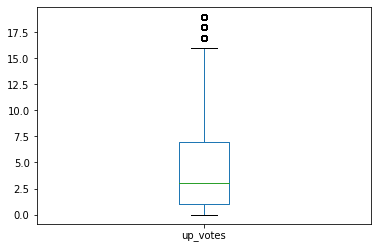

In [ ]:
nonNSFW.up_votes[nonNSFW.up_votes<20].plot.box()